<a href="https://colab.research.google.com/github/manoharsham/topic_model/blob/master/Doc2vec_Devo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic Modeling in Python**
Its a method to extract hidden topics from a document/corpus and label certain parts of it. This helps to segment a document to certain topics for different users. It is helpful for summarization, improving customer support, SEO and many more.

In [0]:
  NUM_OF_TRAIN=400
  NUM_OF_DEVOPEDIA_ARTICLES=225
  FULL_DEVO_TRAIN=1
  ALPHA_STEP=0.001
  MIN_ALPHA=0.000125
  MAX_EPOCHS = 20
  EMB_DIM = 50
  DEBUG_MODE=1
  alpha = 0.025

In [135]:
#Parsing Devopedia data
from google.colab import drive
drive.mount('/content/gdrive')
import json
#inpfilename='/content/gdrive/My Drive/devopediaArticles.json'
outfilename='/content/gdrive/My Drive/devodoc_full2.json'
with open(outfilename) as json_file:
    data = json.load(json_file)
doclist_test=data['text']
titles_test=data['title']
related_test=data['related']

print(len(related_test))



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
517


In [136]:
#create unique wiki data and then wiki+devo -->titles, wiki only
import numpy as np

#indices = [i for i, x in enumerate(titles) if x == 'Neural Style Transfer']
if(FULL_DEVO_TRAIN): #Separate test set and Test set followed by wiki set not present in test set
  titles_train=titles_test.copy()
  doclist_train=doclist_test.copy()
  related_train=related_test.copy()
  titles_full=titles_train.copy()
  doclist_full=doclist_train.copy()
  related_full=related_train.copy()
  titles_test= titles_full[0:NUM_OF_DEVOPEDIA_ARTICLES].copy()
  doclist_test= doclist_full[0:NUM_OF_DEVOPEDIA_ARTICLES].copy()
  related_test= related_full[0:NUM_OF_DEVOPEDIA_ARTICLES].copy()
  

 
else:#Test set separate and Wiki only set not present in Test set separate
  titles_train=[]
  doclist_train=[]
  related_train=[]
  titles_full=titles_test.copy()
  doclist_full=doclist_test.copy()
  related_full=related_test.copy()
  titles_train=titles_test[-NUM_OF_TRAIN:].copy()
  doclist_train=doclist_test[-NUM_OF_TRAIN:].copy()
  related_train=related_test[-NUM_OF_TRAIN].copy()
  titles_test=titles_full[0:-NUM_OF_TRAIN].copy()
  doclist_test=doclist_full[0:-NUM_OF_TRAIN].copy
  related_test=related_test[0:-NUM_OF_TRAIN].copy()
 
titles=titles_train.copy()
doclist=doclist_train.copy()
related=related_train.copy() 
print(len(titles_test))
print(len(titles_train))
print(len(titles_full))




225
517
517


In [0]:
#import modules
import matplotlib.pyplot as plt

In [138]:
print(len(doclist))
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords') 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

517
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
import re
import nltk

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [140]:
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("prints"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
print


In [0]:
#Preprocess data function
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from string import punctuation

def preprocess_data(document):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    #p_stemmer = PorterStemmer()
    # create lemmaizer for lemmatization
    lemmatizer = WordNetLemmatizer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
        # clean and tokenize document string
    #raw = ''.join(document).lower()
    document=expand_contractions(document.lower(),contractions_dict)
    document=re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", document)
    document = ''.join(c for c in document if c not in punctuation)

    document=document.lower().replace('(','').replace(')','')
    document=document.replace(',','').replace('.','').replace(':','').replace(';','')
    raw = document.lower()
    #tokenizer = RegexpTokenizer(r'\w+')
    #tokens = tokenizer.tokenize(raw)
    tokens = word_tokenize(raw)
        # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
        # lemma tokens
    lemma_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
        # add tokens to list
    #texts.append(stemmed_tokens)
    texts=lemma_tokens
    return texts

In [142]:
print(preprocess_data(doclist[300]))                      ## for stemming

['identity', 'management', 'idm', 'also', 'known', 'identity', 'access', 'management', 'iam', 'idam', 'framework', 'policy', 'technology', 'ensuring', 'proper', 'people', 'enterprise', 'appropriate', 'access', 'technology', 'resource', 'idm', 'system', 'fall', 'overarching', 'umbrella', 'security', 'data', 'management', 'identity', 'access', 'management', 'system', 'identify', 'authenticate', 'authorize', 'individual', 'utilizing', 'resource', 'also', 'hardware', 'application', 'employee', 'need', 'access', 'identity', 'access', 'management', 'solution', 'become', 'prevalent', 'critical', 'recent', 'year', 'regulatory', 'compliance', 'requirement', 'become', 'increasingly', 'rigorous', 'complex', 'address', 'need', 'ensure', 'appropriate', 'access', 'resource', 'across', 'increasingly', 'heterogeneous', 'technology', 'environment', 'meet', 'increasingly', 'rigorous', 'compliance', 'requirement', 'term', 'identity', 'management', 'idm', 'identity', 'access', 'management', 'used', 'inter

In [0]:
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(doclist)]
#tagged_data = [TaggedDocument(words=preprocess_data(_d), tags=[str(i)]) for i, _d in enumerate(doclist)]
#tagged_data[758]

In [144]:
tagged_data = [TaggedDocument(words=preprocess_data(_d), tags=[str(i)]) for i, _d in enumerate(doclist_full)]
tagged_data_full = [preprocess_data(_d) for i, _d in enumerate(doclist_full)]

print(tagged_data[100][0])
print(list(tagged_data_full[100]))

['imagepng', 'selection', 'deep', 'learning', 'framework', 'corporate', 'backing', 'source', 'den', 'bakker', 'den', 'bakker', 'deep', 'learning', 'dl', 'neural', 'network', 'approach', 'machine', 'learning', 'ml', 'possible', 'build', 'dl', 'solution', 'scratch', 'dl', 'framework', 'convenient', 'way', 'build', 'quickly', 'framework', 'provide', 'different', 'neural', 'network', 'architecture', 'box', 'popular', 'language', 'developer', 'use', 'across', 'multiple', 'platform', 'choosing', 'framework', 'problem', 'depends', 'number', 'factor', 'therefore', 'possible', 'name', 'one', 'framework', 'preferred', 'another', 'many', 'framework', 'open', 'source', 'cloud', 'provider', 'also', 'provide', 'easy', 'way', 'deploy', 'execute', 'framework', 'infrastructure', 'sometimes', 'term', 'framework', 'used', 'interchangeably', 'term', 'toolkit', 'libraryimagepng', 'chart', 'showing', 'popular', 'dl', 'framework', 'source', 'hale', 'hale', 'among', 'popular', 'open', 'source', 'dl', 'framewo

In [145]:


model = Doc2Vec(vector_size=EMB_DIM,
                alpha=alpha, 
                min_alpha=alpha,
                min_count=2,
                dm =0,dbow_words=1)
               

In [146]:
model.build_vocab(tagged_data)
ref_vec1=[]
ref_vec2=[]
for epoch in range(MAX_EPOCHS):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    

    if(DEBUG_MODE==1):
      ref_vec1.append(model.docvecs[str(45)])
      ff1=model.infer_vector(list(tagged_data_full[45]))
      ref_vec2.append(model.docvecs[str(145)])
      ff2=model.infer_vector(list(tagged_data_full[145]))
      if(epoch>1):
        print(np.dot(ref_vec1[epoch],ref_vec1[epoch-1])/np.sqrt(np.dot(ref_vec1[epoch],ref_vec1[epoch])*np.dot(ref_vec1[epoch-1],ref_vec1[epoch-1])))
        print(np.dot(ff1,ref_vec1[epoch])/np.sqrt(np.dot(ff1,ff1)*np.dot(ref_vec1[epoch],ref_vec1[epoch])))
        print(np.dot(ref_vec2[epoch],ref_vec2[epoch-1])/np.sqrt(np.dot(ref_vec2[epoch],ref_vec2[epoch])*np.dot(ref_vec2[epoch-1],ref_vec2[epoch-1])))
        print(np.dot(ff2,ref_vec2[epoch])/np.sqrt(np.dot(ff2,ff2)*np.dot(ref_vec2[epoch],ref_vec2[epoch])))
        print(model.alpha)

    # decrease the learning rate
    model.alpha -= ALPHA_STEP
    model.alpha=max(model.alpha,MIN_ALPHA)
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    

model.save("d2v.model")
print("Model Saved")

iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 1
iteration 2
1.0
0.91510814
1.0
0.92851484
0.023
iteration 3
1.0
0.91564196
1.0
0.9247079
0.022
iteration 4
1.0
0.9338464
1.0
0.94098926
0.020999999999999998
iteration 5
1.0
0.93894035
1.0
0.94689
0.019999999999999997
iteration 6
1.0
0.93993753
1.0
0.92212737
0.018999999999999996
iteration 7
1.0
0.9333887
1.0
0.9521135
0.017999999999999995
iteration 8
1.0
0.9363419
1.0
0.92488945
0.016999999999999994
iteration 9
1.0
0.95392144
1.0
0.9401182
0.015999999999999993
iteration 10
1.0
0.9378138
1.0
0.94570184
0.014999999999999993
iteration 11
1.0
0.9571391
1.0
0.9482961
0.013999999999999992
iteration 12
1.0
0.9489158
1.0
0.9645832
0.01299999999999999
iteration 13
1.0
0.9463468
1.0
0.95951766
0.01199999999999999
iteration 14
1.0
0.9505759
1.0
0.9697467
0.010999999999999989
iteration 15
1.0
0.9490917
1.0
0.9629939
0.009999999999999988
iteration 16
1.0
0.9484942
1.0
0.9653975
0.008999999999999987
iteration 17
1.0
0.94876593
1.0
0.9672195
0.007999999999999986
iteration 18
1.0
0.9562882

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [147]:
#Compute the metric and dump the results based on the metric 
import random
#ref_id=random.randint(0,len(titles));
#ref_id=774
fields = ['ref doc', 'predicted see also', 'predicted metric', 'wiki see also','predicted metric for wiki','Success']  
#fields = ['ref doc', 'predicted see also[JS]', 'predicted metric[JS]', 'predicted see also[HM]', 'predicted metric[HM]', 'wiki see also','predicted metric for wiki[JS]','predicted metric for wiki[HM]']  
#fields = ['ref doc', 'predicted see also[JS]', 'predicted metric[JS]', 'predicted see also[HM]', 'predicted metric[HM]']  
model= Doc2Vec.load("d2v.model")
model.alpha=MIN_ALPHA
resultsDict={}
docvecs=[]
docvecs2=[]
docnames=[]
titles1_full=np.array(titles_full)
titles1_test=np.array(titles_test)
titles1_train=np.array(titles_train)

print(len(titles1_test))
print(len(titles1_train))
print(len(titles1_full))
TOPK=10
from gensim.matutils import hellinger
###Compute the distribution vectors for all data (wiki+devopedia)
for ref_id in range(len(titles1_full)):
  docvecs2.append(model.docvecs[str(ref_id)])
  docvecs.append(model.infer_vector(list(tagged_data_full[ref_id])))

  docnames.append(titles1_full[ref_id]) 
  
  if(DEBUG_MODE==2):
    v1=model.docvecs[str(ref_id)]
    v2=model.infer_vector(list(tagged_data[ref_id][0]),alpha=MIN_ALPHA,min_alpha=MIN_ALPHA,epochs=100)
    v3=model.infer_vector(list(tagged_data_full[ref_id]),alpha=MIN_ALPHA,min_alpha=MIN_ALPHA,epochs=100)
    print(np.dot(v1,v2)/(np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))))
    print(np.dot(v1,v3)/(np.sqrt(np.dot(v1,v1)*np.dot(v3,v3))))
    print(np.dot(v2,v3)/(np.sqrt(np.dot(v2,v2)*np.dot(v3,v3))))
  
##Compute the see also for the wiki only data  
cos_sim2=[]
for ref_id in range(len(titles1_test)):
  cos_sim1=[]
  cos_sim2.append(np.dot(docvecs[ref_id],docvecs2[ref_id])/(np.sqrt(np.dot(docvecs[ref_id],docvecs[ref_id])*np.dot(docvecs2[ref_id],docvecs2[ref_id]))))
  print(ref_id)
  for docid in range(len(titles1_full)):
    if(docnames[docid]==docnames[ref_id]):
      cos_sim1.append(0)
      continue
    doc_i=docvecs[docid]
    doc0=docvecs[ref_id] 
    csim=np.dot(doc0,doc_i)/(np.sqrt(np.dot(doc0,doc0)*np.dot(doc_i,doc_i)))
    cos_sim1.append(csim)
  #plt.plot(jssim_vec)
  #plt.show
#print(doclist[0])
  cos_sim=np.array(cos_sim1)
  #print(len(cos_sim))
  top5idx=np.argpartition(cos_sim, -TOPK)[-TOPK:]
  related1=np.array(related_full)
  resultsDict.setdefault(fields[0], []).append(titles1_full[ref_id])
  resultsDict.setdefault(fields[1], []).append(titles1_full[top5idx[:TOPK]])
  resultsDict.setdefault(fields[2], []).append(cos_sim[top5idx[:TOPK]])
  ##Check the metric values for the see also present in the Dataset
  if(ref_id > len(titles1_test)):
    U=[S[2:] for S in related1[ref_id].split('\n')]
    U=U[1:-1]
    if '' in U:
      U=U[:U.index('')]
  else:
     U=related1[ref_id]   
  #print('Top five related documents from Wiki-->',U)
  overlap_idx=[]
  wikiseenames=[]
  wikiseemetrics=[]
  wikiseemetrics_hm=[]

  for ind in range(len(U)):
    for ind2 in range(len(doclist)):
      if(U[ind]==titles_full[ind2]):
        overlap_idx.append(ind2)
        wikiseenames.append(titles1_full[ind2])
        wikiseemetrics.append(cos_sim[ind2])
          
  resultsDict.setdefault(fields[3], []).append(wikiseenames)
  resultsDict.setdefault(fields[4], []).append(wikiseemetrics)
  resultsDict.setdefault(fields[5], []).append(len([correct for correct in titles1_full[top5idx[:TOPK]] if correct in wikiseenames]))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


225
517
517
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224


In [148]:
import random
ref_id=random.randint(0,len(titles1_test));
v1=model.docvecs[str(ref_id)]
v2=model.infer_vector(list(tagged_data[ref_id][0]))
v3=model.infer_vector(list(tagged_data_full[ref_id]))

print(np.dot(v1,v2)/(np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))))
print(np.dot(v1,v3)/(np.sqrt(np.dot(v1,v1)*np.dot(v3,v3))))
print(np.dot(v2,v3)/(np.sqrt(np.dot(v2,v2)*np.dot(v3,v3))))

0.9246642
0.92554665
0.9983656


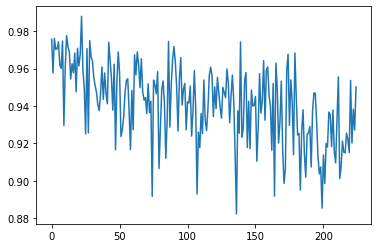

In [149]:
plt.plot(cos_sim2)

In [150]:
dictlist = [dict() for x in range(len(titles1_test))]
dictlist = [{fields[0]:resultsDict[fields[0]][i],fields[1]:resultsDict[fields[1]][i],fields[2]:resultsDict[fields[2]][i],fields[3]:resultsDict[fields[3]][i], fields[4]:resultsDict[fields[4]][i], fields[5]:resultsDict[fields[5]][i]} for i in range(len(titles1_test))]
#print(dictlist)
from google.colab import drive
drive.mount('/content/gdrive')
import csv
filename = '/content/gdrive/My Drive/results_Doc2Vec_fulltrain_embdim'+str(EMB_DIM)+'_TOP'+str(TOPK)+'.csv'
    
print(filename)
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv dict writer object  
    writer = csv.DictWriter(csvfile, fieldnames = fields)  
        
    # writing headers (field names)  
    writer.writeheader()  
    print('Manohar')    
    # writing data rows 
    for data in dictlist:
      writer.writerow(data)
#!cp filename "/content/gdrive/My Drive/"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/results_Doc2Vec_fulltrain_embdim50_TOP10.csv
Manohar


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Average number of correctly identified seel also [Topic modelling] =  0.8044444444444444
Average number of correctly identified seel also [Doc2Vec]  =  2.0355555555555553


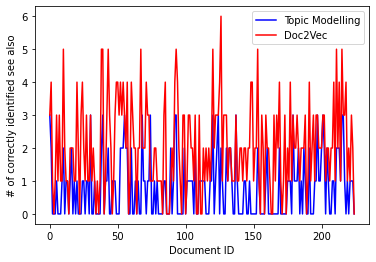

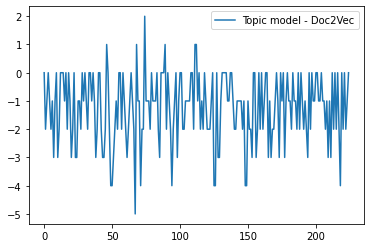

0.02666666666666667


In [151]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 

data = pd.read_csv("/content/gdrive/My Drive/results_LDA_NT20_P40_TOP10.csv") 
data1 = pd.read_csv(filename) 
# Preview the first 5 lines of the loaded data 
print('Average number of correctly identified seel also [Topic modelling] = ',data['Success[HM]'].sum()/len(titles1_test))
print('Average number of correctly identified seel also [Doc2Vec]  = ',data1['Success'].sum()/len(titles1_test))
TM_success=data['Success[HM]']
Doc2vec_success=data1['Success']
import matplotlib.pyplot as plt
plt.plot(TM_success,'b-',label='Topic Modelling')
plt.plot(Doc2vec_success,'r-',label='Doc2Vec')
plt.xlabel('Document ID')
plt.ylabel('# of correctly identified see also')
plt.legend()
plt.show()

plt.plot(TM_success-Doc2vec_success,label='Topic model - Doc2Vec')
plt.legend()
plt.show()

diff=TM_success-Doc2vec_success
print((diff>0).sum()/225)

In [152]:
min(3,4)

3